In [1]:
#Import Necessary Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv('maligant_train.csv')
df_test=pd.read_csv('maligant_test.csv')

In [3]:
df_test.drop('id',axis=1,inplace=True)

# Visualization

In [4]:
abc=['malignant','highly_malignant','rude','threat','abuse','loathe']

malignant
0    144277
1     15294
Name: malignant, dtype: int64


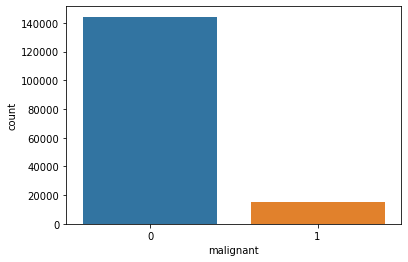

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


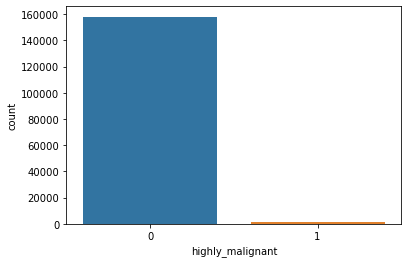

rude
0    151122
1      8449
Name: rude, dtype: int64


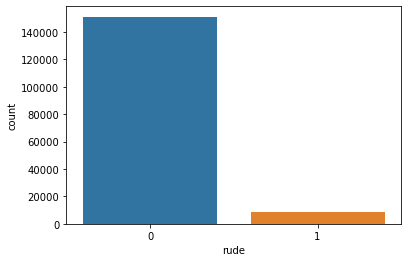

threat
0    159093
1       478
Name: threat, dtype: int64


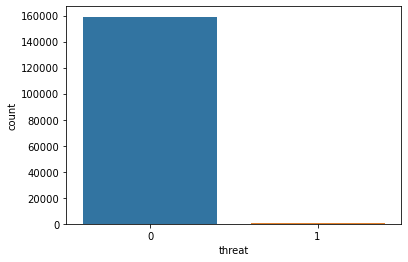

abuse
0    151694
1      7877
Name: abuse, dtype: int64


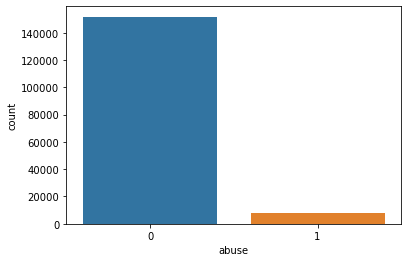

loathe
0    158166
1      1405
Name: loathe, dtype: int64


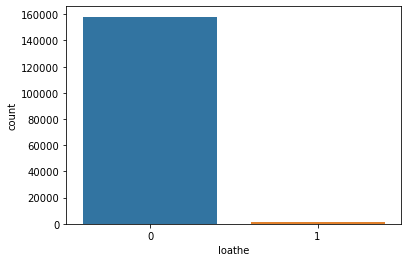

In [5]:
for i in abc:
    print(i)
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

In [6]:
df['length']=df['comment_text'].str.len()
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [7]:
#Convert Into Lower Case
df['comment_text']=df['comment_text'].str.lower()

In [8]:
#Convert Into Lower Case
df_test['comment_text']=df_test['comment_text'].str.lower()

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [10]:
stop_words=stopwords.words('english')
lemma=WordNetLemmatizer()

In [11]:
#replaces email address
df['comment_text']=df['comment_text'].str.replace("[\w._%+-]{1,20}@[\w._]{1,20}.[A-Za-z]{2,3}",'emailaddress')

#replaces with phone number
df['comment_text']=df['comment_text'].str.replace("\d{3}[\s-]\d{4}[\s-]\d{3}[\s-]",'phonenumber')

#replace money symbol with money
df['comment_text']=df['comment_text'].str.replace(r'\$','dollars')

#replace numbers with number
df['comment_text']=df['comment_text'].str.replace(r'\d+(\.\d+)?','number')

#remove punctuation
df['comment_text']=df['comment_text'].str.replace(r'[^\w\d\s]',' ')

#replace white spaces with single space
df['comment_text']=df['comment_text'].str.replace(r'\s+',' ')

#replace Leading and trailing whitespace
df['comment_text']=df['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [12]:
#replaces email address
df_test['comment_text']=df_test['comment_text'].str.replace("[\w._%+-]{1,20}@[\w._]{1,20}.[A-Za-z]{2,3}",'emailaddress')

#replaces with phone number
df_test['comment_text']=df_test['comment_text'].str.replace("\d{3}[\s-]\d{4}[\s-]\d{3}[\s-]",'phonenumber')

#replace money symbol with money
df_test['comment_text']=df_test['comment_text'].str.replace(r'\$','dollars')

#replace numbers with number
df_test['comment_text']=df_test['comment_text'].str.replace(r'\d+(\.\d+)?','number')

#remove punctuation
df_test['comment_text']=df_test['comment_text'].str.replace(r'[^\w\d\s]',' ')

#replace white spaces with single space
df_test['comment_text']=df_test['comment_text'].str.replace(r'\s+',' ')

#replace Leading and trailing whitespace
df_test['comment_text']=df_test['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [13]:
def cleantext(text):
    text=str(text).lower()  # lower the cases
    spl_char=re.sub(r'[^a-zA-Z0-9]',' ',text) # remove punctuation
    token=nltk.word_tokenize(spl_char)   # word tokenization
    words=[word for word in token if word not in stop_words ] # remove stop words
    tag_list=pos_tag(words,tagset=None) # part of speech use
    clean_text=[]
    for token,pos_token in tag_list:
        if pos_token.startswith('V'): #verb
            pos_val='v'
        elif pos_token.startswith('J'):# adjectove
            pos_val='a'
        elif pos_token.startswith('R'): #adverb 
            pos_val='r'
        else:
            pos_val='n' #noun
        lema_words=lemma.lemmatize(token,pos_val)
        clean_text.append(lema_words)
        
    return " ".join(clean_text)   

In [14]:
df['comment_text']=df['comment_text'].apply(cleantext)

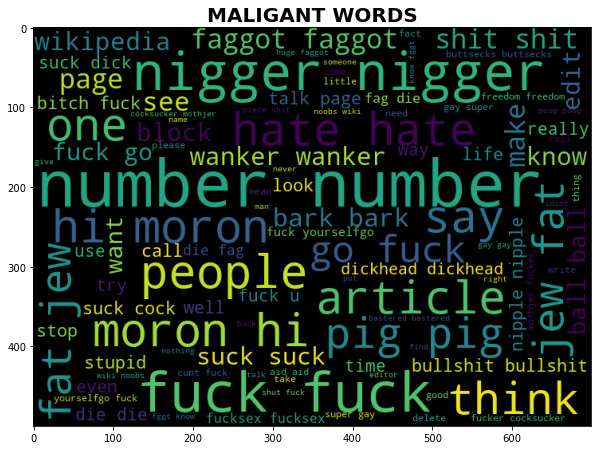

In [15]:
from wordcloud import WordCloud

hate=df['comment_text'][df['malignant']==1]

hate_cloud=WordCloud(width=700,height=500,background_color='black',max_words=100).generate(' '.join(hate))
plt.figure(figsize=(10,8))
plt.imshow(hate_cloud)
plt.title('MALIGANT WORDS',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

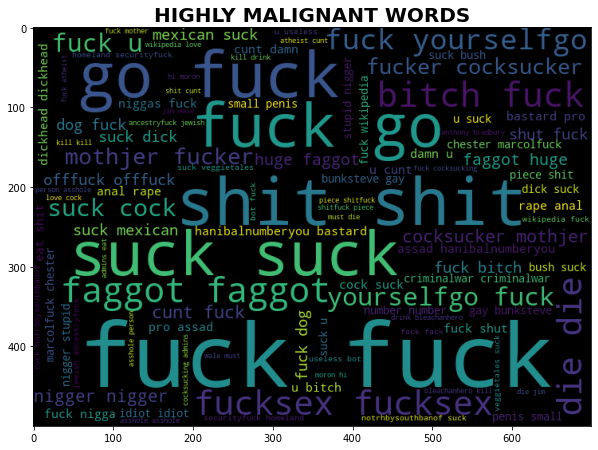

In [16]:
hate=df['comment_text'][df['highly_malignant']==1]

hate_cloud=WordCloud(width=700,height=500,background_color='black',max_words=100).generate(' '.join(hate))
plt.figure(figsize=(10,8))
plt.imshow(hate_cloud)
plt.title('HIGHLY MALIGNANT WORDS',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

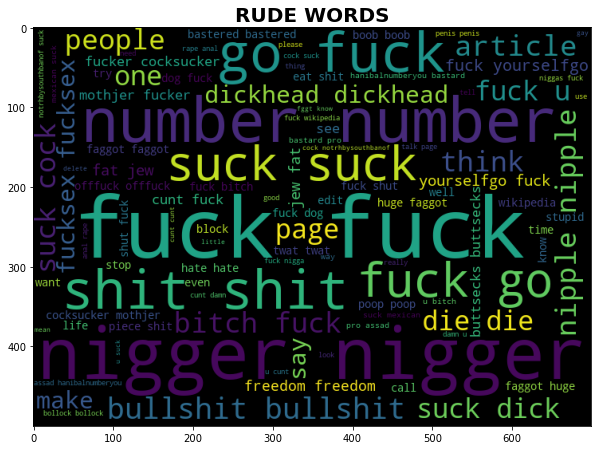

In [17]:
hate=df['comment_text'][df['rude']==1]

hate_cloud=WordCloud(width=700,height=500,background_color='black',max_words=100).generate(' '.join(hate))
plt.figure(figsize=(10,8))
plt.imshow(hate_cloud)
plt.title('RUDE WORDS',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

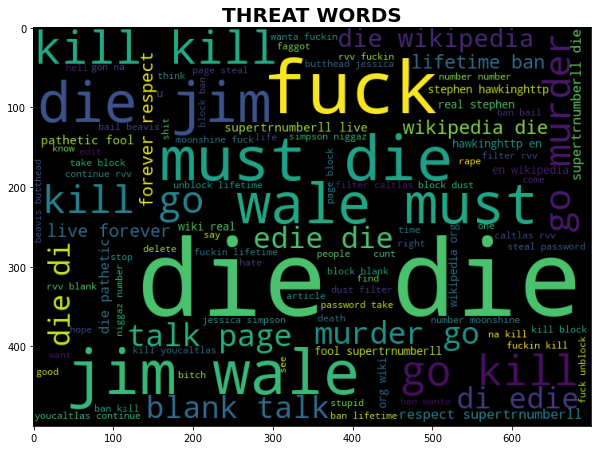

In [18]:
hate=df['comment_text'][df['threat']==1]

hate_cloud=WordCloud(width=700,height=500,background_color='black',max_words=100).generate(' '.join(hate))
plt.figure(figsize=(10,8))
plt.imshow(hate_cloud)
plt.title('THREAT WORDS',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

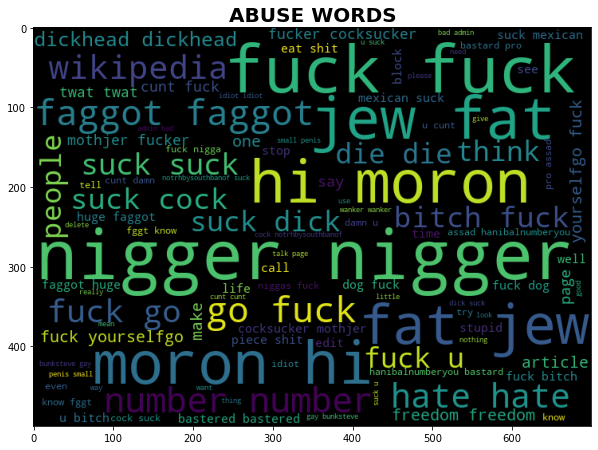

In [19]:
hate=df['comment_text'][df['abuse']==1]

hate_cloud=WordCloud(width=700,height=500,background_color='black',max_words=100).generate(' '.join(hate))
plt.figure(figsize=(10,8))
plt.imshow(hate_cloud)
plt.title('ABUSE WORDS',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

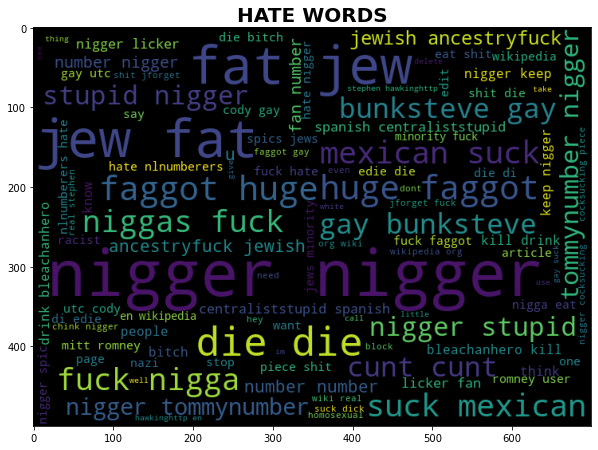

In [20]:
hate=df['comment_text'][df['loathe']==1]

hate_cloud=WordCloud(width=700,height=500,background_color='black',max_words=100).generate(' '.join(hate))
plt.figure(figsize=(10,8))
plt.imshow(hate_cloud)
plt.title('HATE WORDS',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

In [21]:
#Dropping Uncessary Column
df.drop('id',axis=1,inplace=True)

In [22]:
df.drop(['length'],axis=1,inplace=True)

In [23]:
#Spliting Traget Variable
Y=df.iloc[:,1:]
Y

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [25]:
tf=TfidfVectorizer(analyzer='word')
cv=CountVectorizer()

In [26]:
x=tf.fit_transform(df['comment_text'])

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.30,random_state=1)

In [28]:
x_train.shape

(111699, 161710)

In [29]:
x_test.shape

(47872, 161710)

In [30]:
y_train.shape

(111699, 6)

In [31]:
y_test.shape

(47872, 6)

# Apply Diff Diff Model

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
naive=MultinomialNB()

In [33]:
def j_score(y_test,y_pred):
    jaccard=np.minimum(y_test,y_pred).sum(axis=1)/np.maximum(y_test,y_pred).sum(axis=1)
    return jaccard.mean()*100

In [34]:
clf2=OneVsRestClassifier(naive)
clf2.fit(x_train,y_train)
y_pred_nv=clf2.predict(x_test)
print('Train Score',clf2.score(x_train,y_train)*100)
print('Accuracy_Score',accuracy_score(y_test,y_pred_nv))
print('f1 score',f1_score(y_test,y_pred_nv,average='weighted'))
print('Classification_Report\n',classification_report(y_test,y_pred_nv))
print('j score',j_score(y_test,y_pred_nv))

Train Score 90.07242678985487
Accuracy_Score 0.8974557152406417
f1 score 0.18360521554055037
Classification_Report
               precision    recall  f1-score   support

           0       0.99      0.17      0.28      4695
           1       0.00      0.00      0.00       491
           2       0.98      0.10      0.19      2544
           3       0.00      0.00      0.00       154
           4       0.92      0.03      0.07      2387
           5       0.00      0.00      0.00       442

   micro avg       0.98      0.10      0.19     10713
   macro avg       0.48      0.05      0.09     10713
weighted avg       0.87      0.10      0.18     10713
 samples avg       0.02      0.01      0.01     10713

j score 7.015745393634827


In [35]:
lg=LogisticRegression()
clf1=OneVsRestClassifier(lg)
clf1.fit(x_train,y_train)
y_pred_lg=clf1.predict(x_test)
print('Train Score',clf2.score(x_train,y_train)*100)
print('Accuracy_Score',accuracy_score(y_test,y_pred_lg))
print('f1 score',f1_score(y_test,y_pred_lg,average='weighted')*100)
print('Classification_Report\n',classification_report(y_test,y_pred_lg))
print('j score',j_score(y_test,y_pred_lg))

Train Score 90.07242678985487
Accuracy_Score 0.916757185828877
f1 score 65.01172539799906
Classification_Report
               precision    recall  f1-score   support

           0       0.93      0.58      0.71      4695
           1       0.56      0.24      0.34       491
           2       0.90      0.61      0.73      2544
           3       0.79      0.07      0.13       154
           4       0.82      0.49      0.61      2387
           5       0.69      0.14      0.24       442

   micro avg       0.88      0.53      0.66     10713
   macro avg       0.78      0.36      0.46     10713
weighted avg       0.87      0.53      0.65     10713
 samples avg       0.05      0.05      0.05     10713

j score 39.549549549549496


In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

clf=OneVsRestClassifier(dtc)
clf.fit(x_train,y_train)
y_pred_dtc=clf.predict(x_test)
print('Train Score',clf2.score(x_train,y_train)*100)
print('Accuracy_Score',accuracy_score(y_test,y_pred_dtc)*100)
print('f1 score',f1_score(y_test,y_pred_dtc,average='weighted')*100)
print('Classification_Report\n',classification_report(y_test,y_pred_dtc))
print('j score',j_score(y_test,y_pred_dtc))

Train Score 90.07242678985487
Accuracy_Score 89.2379679144385
f1 score 65.2864594562523
Classification_Report
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      4695
           1       0.35      0.25      0.29       491
           2       0.76      0.75      0.76      2544
           3       0.36      0.20      0.26       154
           4       0.61      0.59      0.60      2387
           5       0.49      0.36      0.42       442

   micro avg       0.68      0.64      0.66     10713
   macro avg       0.55      0.47      0.50     10713
weighted avg       0.67      0.64      0.65     10713
 samples avg       0.06      0.06      0.06     10713

j score 38.29122478685789


# Apply Test Data

In [37]:
tf.transform(df_test['comment_text'])

<153164x161710 sparse matrix of type '<class 'numpy.float64'>'
	with 3987985 stored elements in Compressed Sparse Row format>

In [38]:
result=clf1.predict(tf.transform(df_test['comment_text']))
result

array([[1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [39]:
pd.DataFrame(result,index=df_test['comment_text'],columns=['malignant','highly_malignant','rude','threat','abuse','loathe'])

,malignant,highly_malignant,rude,threat,abuse,loathe
comment_text,,,,,,
yo bitch ja rule is more succesful then you ll ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time,1,0,1,0,1,0
from rfc the title is fine as it is imo,0,0,0,0,0,0
sources zawe ashton on lapland,0,0,0,0,0,0
if you have a look back at the source the information i updated was the correct form i can only guess the source hadn t updated i shall update the information once again but thank you for your message,0,0,0,0,0,0
i don t anonymously edit articles at all,0,0,0,0,0,0
...,...,...,...,...,...,...
i totally agree this stuff is nothing but too long crap,1,0,0,0,0,0
throw from out field to home plate does it get there faster by throwing to cut off man or direct from out fielder were the out fielders in the mickey mantle era have better arms rich,0,0,0,0,0,0
okinotorishima categories i see your changes and agree this is more correct i had gotten confused but then found this while acknowledging japan s territorial rights to okinotorishima itself however is there a category for did not acknowledge japan s claim to an exclusive economic zone eez stemming from okinotorishima that is is there a category for disputed eez s,0,0,0,0,0,0
